# dask
multiprocessing 활용 시 메모리 및 연산효율을 기대할 수 있지만 사용이 직관적이지 못하고 모듈화 시켜야 하는 번거로움이 있습니다.  
또한 데이터 변환 및 작업에는 효율이 좋을 수 있으나 전체 데이터의 계산이 필요한 통계량 계산이나 분석에 사용하기에는 chunk단위의 데이터를 사용하는 특징으로 인하여 구현이 복잡해집니다.  
dask는 이러한 chunk단위 데이터의 병렬처리를 간단하게 수행할 수 있도록 개발 된 병렬처리 프레임워크입니다.  
전체 데이터를 메모리상에 로드하는 개념이 아닌 호출되는 데이터만을 참조하여 작업공간에 배치하여 병렬처리 하는 작동방식을 사용합니다.  
이런 이유로 컴퓨터의 성능 및 메모리 환경과 관계없이 빅데이터 작업을 수행 할 수 있습니다. 
기본적으로 numpy, pandas, scikit-learn의 디자인을 활용하고 pandas 코드 구문과 굉장히 유사하므로 코드 리팩터링으로 워크로드를 판다스에서 dask로 쉽게 전환할 수 있습니다.  
주피터노트북 내 구동도 가능하며 통계량 계산등 numpy, pandas 메소드를 지원하기에 분석을 위한 용도로는 dask가 좋은 선택이 될 수 있습니다.  

 - 작은데이터 - 메모리 사용량 이하(컴퓨팅 및 메모리 문제 없음)
 - 중간데이터 - 메모리 사용량 적정(메모리 로딩 문제가 발생 할 수 있을 정도의 크기 16GB, 32GB)
 - 큰데이터 - 스트리밍 등 실시간 데이터 플로우  

dask는 중간사이즈의 데이터를 처리하는데 특화 된 병렬 프로세스 지원 데이터 핸들링 도구입니다.

In [17]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import dask.dataframe as dd
from dask.diagnostics import ProgressBar

In [14]:
# dask데이터프레임 로딩


In [15]:
# 컬럼데이터 확인


Index(['eqp_model_rev', 'eqp_id_rev', 'area', 'eqp_type', 'ees_type',
       'unit_name_rev', 'disp_name', 'lottype', 'wafer_id', 'param_name_rev',
       'act_time', 'lower_spec_rev', 'param_value_rev', 'upper_spec_rev',
       'step_seq_rev', 'processid_rev', 'partid_rev', 'ppid_rev',
       'recipeid_rev', 'root_lot_id_rev', 'lotid_rev', 'fdc_bin_rev',
       'fdc_model_rev'],
      dtype='object')

In [16]:
# 데이터프레임 호출


,eqp_model_rev,eqp_id_rev,area,eqp_type,ees_type,unit_name_rev,disp_name,lottype,wafer_id,param_name_rev,act_time,lower_spec_rev,param_value_rev,upper_spec_rev,step_seq_rev,processid_rev,partid_rev,ppid_rev,recipeid_rev,root_lot_id_rev,lotid_rev,fdc_bin_rev,fdc_model_rev
npartitions=19,,,,,,,,,,,,,,,,,,,,,,,
,string,string,string,string,string,string,string,string,int64,string,string,string,string,string,string,string,string,string,string,string,string,string,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


전체 데이터를 로드하지 않고 일부에 해당하는 정보만을 출력하고 컬럼의 데이터타입은 유추된 데이터타입입니다.  
dask는 원본 데이터를 npartition으로 칭하는 작은 단위의 데이터프레임으로 분할하며(64MB) 병렬처리 할 프로세스 갯수를 출력합니다.  
작업을 수행하면 함수를 정의하듯 작업만을 객체로 보관하며 compute()를 통해 전체 파티션에 해당하는 연산을 수행합니다.  
위와 같은 지연실행(lazy)작업방식을 통해 메모리를 절약 할 수 있고 여러개의 작업을 서로다른 변수로 저장하기에도 용이합니다.

## 지연실행(lazy) 실행방식과 compute() 연산 테스트

In [8]:
# 중복값 제외 작업 (lazy)


,eqp_model_rev,eqp_id_rev,area,eqp_type,ees_type,unit_name_rev,disp_name,lottype,wafer_id,param_name_rev,act_time,lower_spec_rev,param_value_rev,upper_spec_rev,step_seq_rev,processid_rev,partid_rev,ppid_rev,recipeid_rev,root_lot_id_rev,lotid_rev,fdc_bin_rev,fdc_model_rev
npartitions=19,,,,,,,,,,,,,,,,,,,,,,,
,string,string,string,string,string,string,string,string,int64,string,string,string,string,string,string,string,string,string,string,string,string,string,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [9]:
# 중복값 제외 작업 compute()


,eqp_model_rev,eqp_id_rev,area,eqp_type,ees_type,unit_name_rev,disp_name,lottype,wafer_id,param_name_rev,...,upper_spec_rev,step_seq_rev,processid_rev,partid_rev,ppid_rev,recipeid_rev,root_lot_id_rev,lotid_rev,fdc_bin_rev,fdc_model_rev
16,89C_PX_OX7DQ_D73GPQ,C8OC07,CMP,CMPOXD,<NA>,C8OC07-DR,DR,PP,23,"[""v_cylinder_ebr_z_axis_down_e"",""v_cylinder_eb...",...,"[,,,,,,,,,,,,,,,,,,,,,,,,,,,117.6070016132925,...",EM055240,LBEM,L9XBXS8V0F-BXQ,EMP1V,FO43P4_SIY,BMOB38,BMOB38.1,SI,EMQ_LL_OXPSE_PPOXLE
73,89C_PX_OX7DQ_D73GPQ,C8OC07,CMP,CMPOXD,<NA>,C8OC07-P3,P3,PP,24,"[""infra_sg_hf_pressure_avg_t"",""infra_sg_hf_pre...",...,"[,]",EM055240,LBEM,L9XBXS8V0F-BXQ,EMP1V,-,BMOB38,BMOB38.1,P3,EMQ_LL_OXPSE_PPOXLE
93,89C_PX_OX7DQ_D73GPQ,C8OC07,CMP,CMPOXD,<NA>,C8OC07-FULL,FULL,-,28,"[""chamber_leakrate_avg_t"",""chamber_leakrate_mi...",...,"[,,,]",-,-,-,FVLL,FVLL,FVLL24,FVLL240130,FVLL,EMQ_LL_OXPSE_PPOXLE
106,89C_PX_OX7DQ_D73GPQ,C8OC07,CMP,CMPOXD,<NA>,C8OC07-MG,MG,PP,19,"[""rear_n2_flow_avg_t"",""rear_n2_flow_min_t"",""re...",...,"[,,]",EM055240,LBEM,L9XBXS8V0F-BXQ,EMP1V,FO43P4_MEX,BMOB80,BMOB80.1,MX,EMQ_LL_OXPSE_PPOXLE
107,89C_PX_OX7DQ_D73GPQ,C8OC07,CMP,CMPOXD,<NA>,C8OC07-DR,DR,PP,7,"[""v_load_port_delay_h2738_avg_t"",""v_load_port_...",...,"[,]",EM055240,LBEM,L9XBXS8V0F-BXQ,EMP1V,FO43P4_SIY,BMOB14,BMOB14.1,SI,EMQ_LL_OXPSE_PPOXLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,H_DQ9QD_PCF,WPQC81,CLN,WETSTN,<NA>,WPQC81-SCR_3,SCR_3,-,1,"[""impurity_air_nh2_infra_avg_t"",""impurity_air_...",...,"[-224045.6875968415,,,,,,,,,,]",-,-,-,PPXE3L,POLY10L,B10420,B104202EP,PBI_3,PEMEP_PIPP300P_SEBEP_PPOXLE
5476,H_DQ9QD_PCF,WPQC81,CLN,WETSTN,<NA>,WPQC81-SCR_3,SCR_3,-,5,"[""v_mfc_n2_zero_avg_t"",""v_mfc_n2_zero_min_t"",""...",...,"[,,,,,-7.44434214434214,,26.00420597855325,,,,...",-,-,-,PPXE3L,POLY10L,B10420,B104202EP,PBI_3,PEMEP_PIPP300P_SEBEP_PPOXLE
5486,H_DQ9QD_PCF,WPQC81,CLN,WETSTN,<NA>,WPQC81-SCR_3,SCR_3,-,12,"[""arm2_nz7_post_adm_flow_avg_t"",""arm2_nz7_post...",...,"[,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...",-,-,-,PPXE3L,PPXE2L,B10416,B104161EP,PBI_3,PEMEP_PIPP300P_SEBEP_PPOXLE
5515,H_DQ9QD_PCF,WPQC81,CLN,WETSTN,<NA>,WPQC81-SCR_1,SCR_1,-,3,"[""v_mfc_n2_rotate_fullscale_avg_t"",""v_mfc_n2_r...",...,"[,,,,,,,,,,,1,,,,,,,,,,,,,,,,135.0126]",-,-,-,PPXE3L,POLY10L,B10420,B104202EP,PBI_1,PEMEP_PIPP300P_SEBEP_PPOXLE


In [116]:
# 인덱싱, 슬라이싱 테스트

# 각 데이터프레임별 인덱스가 존재해서 파티션 갯수만큼 데이터 선별

0                         HCD9300
0             89C_PX_OX7DQ_D73GPQ
0         QUGQ3Q_BPUQJ8Y3000_POPY
0             QUGQ3Q_8PB8CBODD_P3
0                          DUPB8Ⅲ
0                     DPD232_POPY
0                     2300_X7YOQX
0                    V77DC8810QHP
0                  8D9P_8BF7_1950
0                      8D9P_XBF_G
0    CQP_P7CH7UD12_PBO_V_7_D73GPQ
0            DQ9QD_POZ7X12_D73GPQ
0            CQP_P7CH7UD12_D73GPQ
0            CQP_P7CH7UD12_D73GPQ
0      DQ9QD_POZ7X12_H-DOH_D73GPQ
0                          UPC798
0                            HQBO
0                   H_CQBC8D_H73G
0                     H_DQ9QD_PCF
Name: eqp_model_rev, dtype: string

In [277]:
# 팬시인덱싱 'wafer_id > 15


,is_met,step_key,root_lot_id,wafer_id,tkout_time,lot_key,partid_rev,area,eqp_key,step_seq_rev,...,target,spec_high,spec_low,lcl,cl,ucl,spc_ctrl_spec_high,spc_ctrl_spec_low,spc_ctrl_spec_limit,rucl
6,Y,7422187,BLEP33,1,2023-01-30 00:47:29,563997244,L9XSXS8V0S-BXQ,METRO,NaN,EL057200,...,50.55,52.75,48.35,NaN,NaN,NaN,51.357400,49.742600,50.55,NaN
18,Y,7422187,BLEP33,1,2023-01-30 00:47:29,563997244,L9XSXS8V0S-BXQ,METRO,NaN,EL057200,...,27.50,31.50,23.50,NaN,NaN,NaN,28.968000,26.032000,27.50,NaN
41,Y,7422187,BLEP33,1,2023-01-30 00:47:29,563997244,L9XSXS8V0S-BXQ,METRO,NaN,EL057200,...,50.55,52.75,48.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Y,7422187,BLEP33,1,2023-01-30 00:47:29,563997244,L9XSXS8V0S-BXQ,METRO,NaN,EL057200,...,27.50,31.50,23.50,NaN,NaN,NaN,28.968000,26.032000,27.50,NaN
69,Y,7422187,BLEP33,1,2023-01-30 00:47:29,563997244,L9XSXS8V0S-BXQ,METRO,NaN,EL057200,...,27.50,31.50,23.50,NaN,NaN,NaN,28.968000,26.032000,27.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91445,Y,7422187,BLE1F3,1,2023-01-30 01:14:44,564043817,L9XSXS8V0S-BXQ,METRO,NaN,EL057200,...,50.55,52.75,48.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91464,Y,7422187,BLE1F3,1,2023-01-30 01:14:44,564043817,L9XSXS8V0S-BXQ,METRO,NaN,EL057200,...,0.00,2.00,-2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91471,Y,7422187,BLE1F3,1,2023-01-30 01:14:44,564043817,L9XSXS8V0S-BXQ,METRO,NaN,EL057200,...,0.95,1.00,0.90,NaN,NaN,NaN,0.968408,0.931592,0.95,NaN
91512,Y,7422187,BLE1F3,1,2023-01-30 01:14:44,564043817,L9XSXS8V0S-BXQ,METRO,NaN,EL057200,...,50.38,52.58,48.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# 팬시인덱싱 'ees_type' 'METRCD
# 'wafer_id > 15


,eqp_model_rev,eqp_id_rev,area,eqp_type,ees_type,unit_name_rev,disp_name,lottype,wafer_id,param_name_rev,...,upper_spec_rev,step_seq_rev,processid_rev,partid_rev,ppid_rev,recipeid_rev,root_lot_id_rev,lotid_rev,fdc_bin_rev,fdc_model_rev
4570,CG4000,MCDC07,METRO,METRCD,METRCD,MCDC07,0,PP,0,"[""erd_wafer_motor_speed_avr_e"",""erd_power_avr_e""]",...,"[10.1024895,,10.104905,0.040134615614,11.5,,,0...",EP071280,LBEP,L9XBXS8V0E-BXQ,LBEP/EP071280P,-,BPO018,BPO018.1,0,LQ_BX4000_BS_PPOXLE
538,CG4000,QD9C815,METRO,METRCD,METRCD,QD9C815,0,EE,0,"[""mfc_cf7_avg_t"",""mfc_cf7_min_t"",""mfc_cf7_max_...",...,"[,,1.38791279762381,,,,,0.7,,,,0.7,,,,2.5,,,,,...",EL078200,LBEL,L9XSXS8V0S-BXQ,LBEL/EL078200P,-,BLB704,BLB704.B1,0,LQ_BX4000_BS_PPOXLE


In [125]:
# 기초통계량 출력


[########################################] | 100% Completed | 6.19 ss


,wafer_id
count,99548.000000
mean,11.872614
std,8.229806
min,0.000000
25%,7.000000
50%,14.000000
75%,21.000000
max,99.000000


In [235]:
# 통계량 계산 


[########################################] | 100% Completed | 5.99 ss


wafer_id
14    3749
16    3660
30      61
34      55
5     3949
      ... 
33      84
39      51
27      64
37      51
56      20
Name: count, Length: 61, dtype: int64

[########################################] | 100% Completed | 6.27 ss


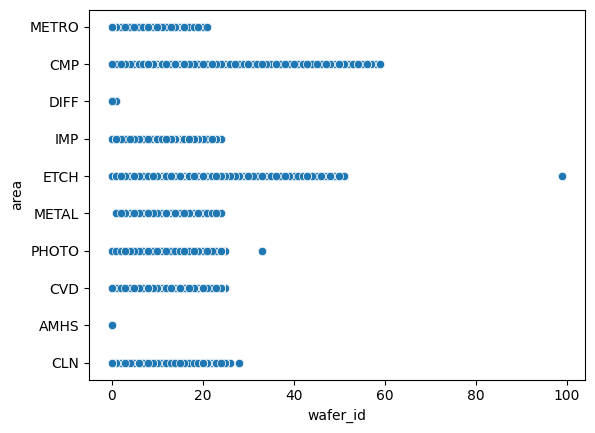

In [234]:
# 시각화 테스트


[########################################] | 100% Completed | 5.96 ss


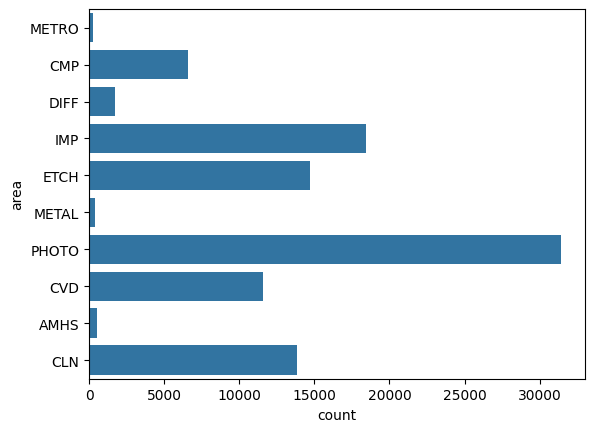

In [118]:
# 각 컬럼별 결측치 갯수 확인


eqp_model_rev          0
eqp_id_rev             0
area                   0
eqp_type               0
ees_type           99274
unit_name_rev          0
disp_name              0
lottype                0
wafer_id               0
param_name_rev         0
act_time               0
lower_spec_rev         0
param_value_rev        0
upper_spec_rev         0
step_seq_rev           0
processid_rev          0
partid_rev             0
ppid_rev               0
recipeid_rev           0
root_lot_id_rev        0
lotid_rev              0
fdc_bin_rev            0
fdc_model_rev          0
dtype: int64

In [120]:
# 각 파티션 연산작업을 진행상황 출력


[########################################] | 100% Completed | 6.18 ss


eqp_model_rev          0
eqp_id_rev             0
area                   0
eqp_type               0
ees_type           99274
unit_name_rev          0
disp_name              0
lottype                0
wafer_id               0
param_name_rev         0
act_time               0
lower_spec_rev         0
param_value_rev        0
upper_spec_rev         0
step_seq_rev           0
processid_rev          0
partid_rev             0
ppid_rev               0
recipeid_rev           0
root_lot_id_rev        0
lotid_rev              0
fdc_bin_rev            0
fdc_model_rev          0
dtype: int64

In [126]:
# 각 컬럼별 고윳값 출력


[########################################] | 100% Completed | 6.04 ss


eqp_model_rev
DUPB8Ⅴ                        2392
Q3DUB8_HG                      335
XQ_DJ1223V3_CX3_DCD9CO          28
97B3000DHD                    1676
CQP_73DY_8PD_OX7DQ             158
                              ... 
89C_PX_OX7DQ_D73GPQ           6586
C8CCB8D_V7GUD                 1265
CQP_P7CH7UD12_PBO_7_D73GPQ    2618
DPD232_9QD8_C7P_POPY            25
H_DQ9QD_BPUQ-7CQ              2331
Name: count, Length: 109, dtype: int64[pyarrow]

[########################################] | 100% Completed | 6.17 ss


eqp_id_rev
C8OC07    626
D3CC22      7
D3CC80      1
D83C05      9
D8OC09     29
         ... 
T88C30    278
T8UC16     48
TH8Q26    459
WC8C02    146
WHDC01    175
Name: count, Length: 755, dtype: int64[pyarrow]

[########################################] | 100% Completed | 5.98 ss


area
CLN      13824
METRO      235
DIFF      1730
ETCH     14690
AMHS       555
METAL      420
PHOTO    31448
IMP      18456
CVD      11604
CMP       6586
Name: count, dtype: int64[pyarrow]

[########################################] | 100% Completed | 6.09 ss


eqp_type
DDPOLY       456
DRTPAN      2672
PSPINF      1980
DOGROW       116
CLN           56
DANEAL       207
IIMPHC      1802
TCPEOX      6985
POVLAY        33
METRPC         9
TCTOSZ      2468
DMTODP       363
DSPOLY      1669
IIMPMC      6276
METROD       127
TCBPSG       475
CMPOXD      6586
TCALDX      1676
EASHNG      4379
JSORTE        39
DPNANL      5998
DALDNT       113
DALDOX       184
STOCKER      555
METRTK        40
MMETAL       420
PMAINF     29468
WETSTN     13768
DNITRD        73
METRMC         3
METRMS         4
METRDI        17
DOXIDE       218
EPOLOX     10311
METRCD         2
Name: count, dtype: int64[pyarrow]

[########################################] | 100% Completed | 6.26 ss


ees_type
POVLAY        33
METRPC         9
METROD       127
Sorter_KT     39
METRTK        40
METRMC         3
METRMS         4
METRDI        17
METRCD         2
Name: count, dtype: int64[pyarrow]

[########################################] | 100% Completed | 6.06 ss


unit_name_rev
C8OC07-P2        73
C8OC07-P3        76
C8OC11-FULL      43
C8OC11-P3         8
C8OC12-INFRA     42
                 ..
WPOC29-SCU_3     30
WPOCB2-COR2_L    15
WPOCB5-PHT1_L    13
WPOCB5-PHT2_L    13
WPOCB6-PHT1_L    11
Name: count, Length: 5204, dtype: int64[pyarrow]

[########################################] | 100% Completed | 5.93 ss


disp_name
110014           6
2-NON_LOT      134
210104           3
210303           4
220106           1
              ... 
SCPL1233        25
SSR_5          237
TM-NON_LOT      30
TR            1626
WCP61          111
Name: count, Length: 679, dtype: int64[pyarrow]

[########################################] | 100% Completed | 6.05 ss


lottype
-     20363
PP    79170
EE       15
Name: count, dtype: int64[pyarrow]

[########################################] | 100% Completed | 6.01 ss


wafer_id
14    3749
16    3660
30      61
34      55
5     3949
      ... 
33      84
39      51
27      64
37      51
56      20
Name: count, Length: 61, dtype: int64

[########################################] | 100% Completed | 7.09 ss


param_name_rev
["accel_voltage_avg_t","accel_voltage_min_t","accel_voltage_max_t","accel_voltage_std_t","amu_avg_t","amu_min_t","amu_max_t","amu_std_t","analyzer_field7_gauss_avg_t","analyzer_field7_gauss_min_t","analyzer_field7_gauss_max_t","analyzer_field7_gauss_std_t","accel_current_avg_t","accel_current_min_t","accel_current_max_t","accel_current_std_t","accel_suppression_voltage_fb_avg_t","accel_suppression_voltage_fb_min_t","accel_suppression_voltage_fb_max_t","accel_suppression_voltage_fb_std_t","analyzer_field2_gauss_avg_t","analyzer_field2_gauss_min_t","analyzer_field2_gauss_max_t","analyzer_field2_gauss_std_t","beam_angle_mean_avg_t","beam_angle_mean_min_t","beam_angle_mean_max_t","beam_angle_mean_std_t","beam_angle_mean_compensation_avg_t","beam_angle_mean_compensation_min_t","beam_angle_mean_compensation_max_t","beam_angle_mean_compensation_std_t","beam_energy_avg_t","beam_energy_min_t","beam_energy_max_t","beam_energy_std_t","corrector_field7_gauss_avg_t","corrector_field7

[########################################] | 100% Completed | 7.33 ss


act_time
["2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00","2024-01-30 00:00:00",

[########################################] | 100% Completed | 6.41 ss


lower_spec_rev
[,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

[########################################] | 100% Completed | 6.71 ss


param_value_rev
[-0.2,-0.2,-0.2,0,-0.2,-0.2,-0.2,0,0,0,0,0,5.25,5.25,5.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.2,-0.2,-0.2,0,-0.2,-0.2,-0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.63999999999999,25.64,25.64,0,5.25,5.25,5.25,0,-0.2,-0.2,-0.2,0,-0.2,-0.2,-0.2,0,2.25,0,5,1.66904592079256,0.22682532793580411,-0.23797743055555556,0.2197265625,0.27582995658571058,0.26977599344135803,-0.25154079861111111,0.2435221354166667,0.2463746199098042,247.2202261506609,246.2468864469,3.2257631257,249.2726495726,0.2107680935141015,246847,246847,246847,0,13.213,13.213,13.213,0,12.25400000000001,12.254,12.254,0,4,4,4,0,246.2771265771333,246.2445665446,246.6422466422,0.25639563055135245,0,0,0,0,0,0,0,0,6392.211621,6392.211621,6392.211621,0,2.259,2.259,2.259,0,2.215,2.215,2.215,0,1.291,1.291,1.291,0,3.246,3.246,3.246,0,25.63999999999999,25.64,25.64,0,247.2940170940125,246.2376068376,0.2860805861,247.2236874237,0.2949236357205919,5.25,5.25,5.25,0,-0.2,-0.2,-0.2,0,-0.2,-0.2,-0.2,0,6,3,9,2.260246899469287,-0.2201

[########################################] | 100% Completed | 6.44 ss


upper_spec_rev
[,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

[########################################] | 100% Completed | 6.03 ss


step_seq_rev
B1ELBMB0S4       1
B1ELOOB5B3       5
EL000040        12
EL015020      1380
EL040400        70
              ... 
EP065700         2
EP073000        32
OS123300        14
OV140120        46
QF120205         1
Name: count, Length: 656, dtype: int64[pyarrow]

[########################################] | 100% Completed | 5.97 ss


processid_rev
LEQF        104
IM0ES0        1
LEOB         26
LBEM      41852
-         20363
LEOV       2132
LEVE          6
LEQL        243
LBEL      31397
LBEP       2248
LEOE        359
LEOS        817
Name: count, dtype: int64[pyarrow]

[########################################] | 100% Completed | 6.00 ss


partid_rev
L9XBXS8V0F-BXQ    41852
L4B4X1646S-EEF      243
-                 18381
L4V2E164EF-ELX     1823
L4B2X1646F-EEF      104
L4E8X085YB-EEF       26
L9XSXS8V0S-BXQ    31398
L4B4X0846E-EEF      817
L4E4X085YE-EEF      359
L9X00B8M0S-EXQ        6
L9XBXS8V0E-BXQ     2248
L4F2E164LF-EEB      309
SAMPLE             1982
Name: count, dtype: int64[pyarrow]

[########################################] | 100% Completed | 6.14 ss


ppid_rev
13_BOLOS080PEB          111
13_S25QL010PPB            2
1BQLBEL.EL070MOB_PLS    275
210104                    3
210303                    4
                       ... 
QEOP4LIL_BLO_PQ           2
QQ_EI_PB1_2              14
QQ_LF60                   5
QQ_O2-BLL-LOY             2
S20OS120PEB              77
Name: count, Length: 683, dtype: int64[pyarrow]

[########################################] | 100% Completed | 6.06 ss


recipeid_rev
12V                        319
1M4                       1213
2LP44_PB40PPP              112
2LP44_PBPPP                167
2LP44_PBPPP,2LP40_PB44       2
                          ... 
SOX-040-0422                28
SVMMY_SIYEI                  3
SVM_BI1                      4
YEB_PEP420POL                2
YLSB_40B                   102
Name: count, Length: 882, dtype: int64[pyarrow]

[########################################] | 100% Completed | 6.03 ss


root_lot_id_rev
103981     4
119830     2
126524    13
131915     9
308946     2
          ..
PMBE04     2
PMBE08     4
QPmeBO     3
VOLOoY    43
“FVLLQ     1
Name: count, Length: 1723, dtype: int64[pyarrow]

[########################################] | 100% Completed | 6.02 ss


lotid_rev
112239EP               17
119491P                 4
121499P                 9
126132P                 5
126282P                 2
                       ..
POBE2627                1
POBE2673                1
POBE2949________.24     2
POBE3602                1
YBL045.1               51
Name: count, Length: 2292, dtype: int64[pyarrow]

[########################################] | 100% Completed | 5.98 ss


fdc_bin_rev
202         204
203         140
3          2225
4           208
423           2
           ... 
PSY11        25
QM1          44
VLLP216      34
VLLP223      39
YBP51        51
Name: count, Length: 667, dtype: int64[pyarrow]

[########################################] | 100% Completed | 6.04 ss


fdc_model_rev
EMQ_VEOQEXE+_IQP_PPOXLE             1264
EPML_LIF_PPOXLE                      923
OV_YBPM300_MP_PPOXLE                   4
QEL_QEBQIEP_VEPQE_E_E_PPOXLE         317
VEIPEO_VPPPQE810_PPOXLE             5239
                                    ... 
MEQQPOO_PEIESPXM_E_XP_E_E_PPOXLE     156
QEL_QIPEP_PO_PPOXLE                 2689
LE_SM1206VO_BX5_ELS_OXPSE_PPOXLE      50
OPLoO_P-LPOe_PPOXLE                  129
POFIE_EEP_PEOPOI_PPOXLE             1866
Name: count, Length: 133, dtype: int64[pyarrow]

In [145]:
# 카테고리 컬럼명 추출


[########################################] | 100% Completed | 5.94 ss
[########################################] | 100% Completed | 6.16 ss
[########################################] | 100% Completed | 6.19 ss
[########################################] | 100% Completed | 6.02 ss
[########################################] | 100% Completed | 5.94 ss
[########################################] | 100% Completed | 5.97 ss
[########################################] | 100% Completed | 5.94 ss
[########################################] | 100% Completed | 6.14 ss
[########################################] | 100% Completed | 6.22 ss
[########################################] | 100% Completed | 6.45 ss
[########################################] | 100% Completed | 6.69 ss
[########################################] | 100% Completed | 6.05 ss
[########################################] | 100% Completed | 6.46 ss
[########################################] | 100% Completed | 6.22 ss
[###################

In [194]:
# wafer_id 별 area카운트 (도메인 지식이 없음...)


[########################################] | 100% Completed | 5.90 ss


wafer_id
2     4026
3     4049
7     3830
12    3659
13    3900
      ... 
49      50
51      34
55      16
58      22
99       9
Name: area, Length: 61, dtype: int64

기존 데이터에는 실수형태의 데이터가 없어 그룹화 실습을 위해 실수형 실습 데이터 로드

In [ ]:
df = dd.read_csv('./data/M_FAB_WF_MET.csv', 
                 dtype={'ein_ecn_no': 'object', 
                        'str_value': 'object'})
# 데이터타입 오류로 타입 지정

,is_met,step_key,root_lot_id,wafer_id,tkout_time,lot_key,partid_rev,area,eqp_key,step_seq_rev,lotid_rev,eqp_id_rev,unit_id,eqp_model_rev,lot_type,ppid_rev,ein_ecn_no,rework_cnt,foup_id_rev,tkin_time,lot_tkout_time,last_flag,last_update_time,processid_rev,curr_lot_id,sendfab_type,load_port,item_id_rev,subitem_id,data_class,fab_value,str_value,target,spec_high,spec_low,lcl,cl,ucl,spc_ctrl_spec_high,spc_ctrl_spec_low,spc_ctrl_spec_limit,rucl
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,string,int64,string,int64,string,int64,string,string,float64,string,string,string,float64,string,string,string,string,int64,string,string,string,string,string,string,string,string,string,string,string,string,float64,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## wafer_id를 기준 spec_high 분석 시각화

[########################################] | 100% Completed | 452.71 ms


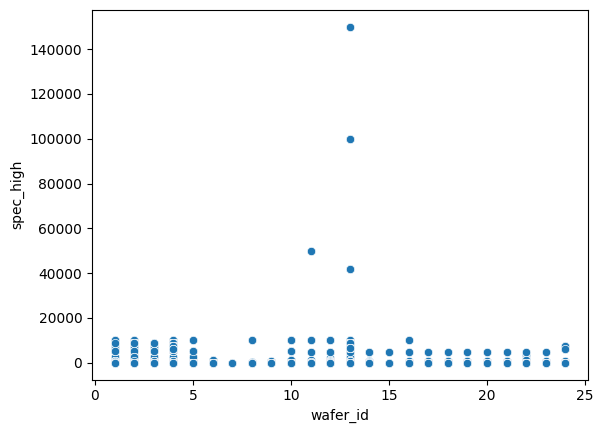

In [24]:
# wafer_id 별 재작업 횟수 카운팅


wafer_id
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
Name: rework_cnt, dtype: int64

In [35]:
# wafer_id 기준 최고스펙 최대값


wafer_id
1     1580.457489
2      874.196523
3     1015.208467
4     1268.092935
5      336.539226
6       84.441060
7       24.956279
8       60.586915
9       81.706074
10     292.086995
11     150.100313
12      87.293921
13    1279.135017
14     138.149739
15      43.597688
16      79.809825
17      29.743099
18      31.954303
19      46.418405
20      46.469352
21      46.663787
22     172.554584
23      44.889098
24     625.722493
Name: spec_high, dtype: float64